In [1]:
import collections
import copy
import itertools
import json
import datetime
import random
import time

import ijson
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd
import tqdm

In [2]:
LANGUAGES = [
    "rust",
    "python",
    "javascript",
    "java",
    "ruby",
    "r",
    "c",
    "php",
]

In [3]:
def iter_items(parser):
    for prefix, event, value in parser:
        if event == 'string':
            yield prefix, value


def load_libs(language):
    loot = {}
    date, imports = None, []
    with open(f"data/results/{language}/{language}_{language}_post_stats.json") as infile:
        for prefix, event, value in tqdm.tqdm(ijson.parse(infile)):
            if prefix == "item.date":
                date = value
            elif prefix == "item.imports.item":
                imports.append(value)
            elif event == "end_map":
                loot[date] = imports
                date, imports = None, []
    return loot

In [4]:
python_libs = load_libs("python")

83461004it [00:44, 1895168.28it/s]


In [7]:
np.array([len(item) for item in python_libs.values()]).mean()

0.6289688478451833

In [ ]:
post_to_libs = {}
for language in LANGUAGES:
    post_to_libs[language] = load_libs(language)

1223691it [00:00, 1706411.90it/s]
83461004it [00:44, 1873020.45it/s]
4694568it [00:03, 1554089.44it/s]
44986639it [00:26, 1713142.08it/s]

(0.0, 20.0)

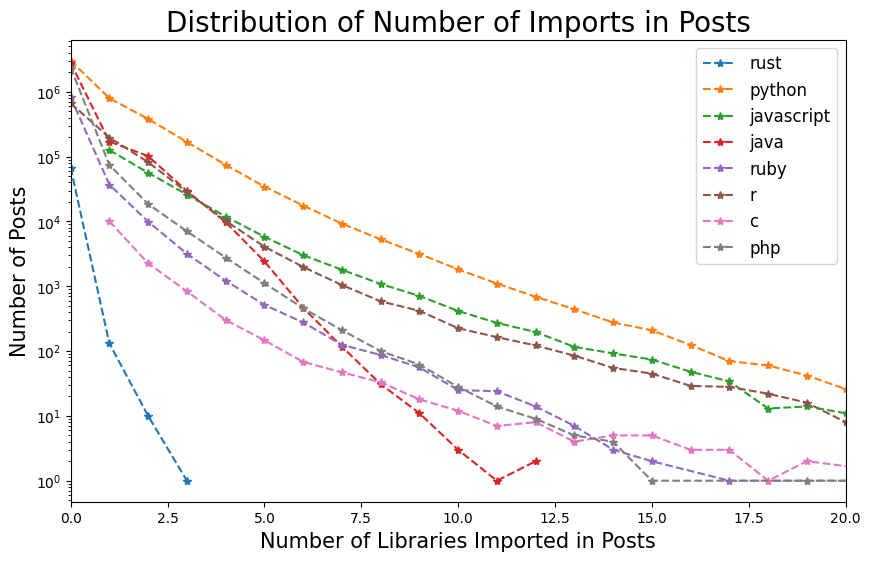

In [59]:
post_count_distr = {
    language: collections.Counter([len(x) for x in post_to_libs[language].values()])
    for language in LANGUAGES
}

plt.figure(figsize=(10,6))

for language in LANGUAGES:
    d = post_count_distr[language]
    plt.plot(sorted(d.keys()), [d[x] for x in sorted(d.keys())], "*--", label=f"{language}")
plt.xlabel("Number of Libraries Imported in Posts", fontsize=15)
plt.ylabel("Number of Posts", fontsize=15)
plt.legend(fontsize=12)
plt.title("Distribution of Number of Imports in Posts", fontsize=20)
plt.semilogy()
plt.xlim(0, 20)


Text(0.5, 1.0, 'Number of Posts over the Years')

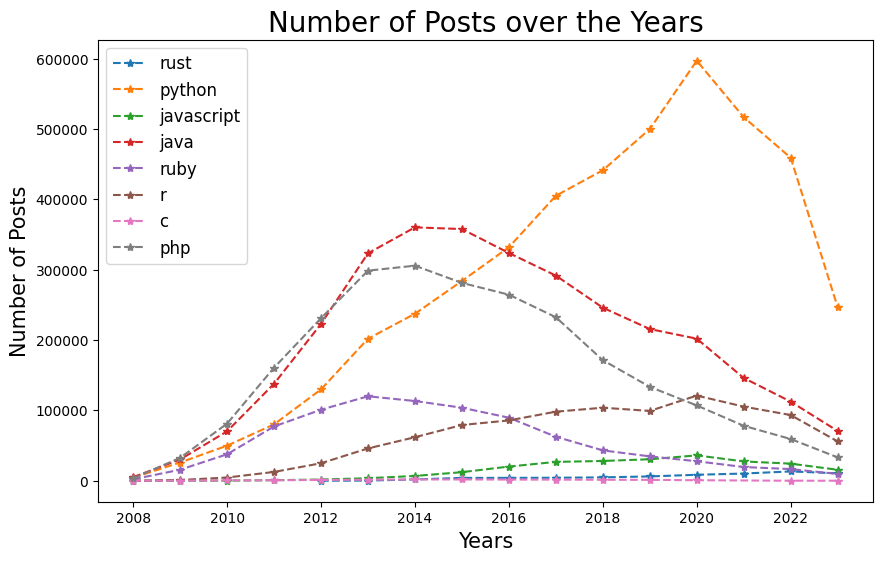

In [58]:
post_count_per_year = {language: collections.defaultdict(int) for language in LANGUAGES}

for language in LANGUAGES:
       post_count_per_year[language] = collections.Counter([int(k[:4]) for k in post_to_libs[language].keys()])

plt.figure(figsize=(10,6))
for language in LANGUAGES:
    d = post_count_per_year[language]
    plt.plot(sorted(d.keys()), [d[x] for x in sorted(d.keys())], "*--", label=f"{language}")
plt.xlabel("Years", fontsize=15)
plt.ylabel("Number of Posts", fontsize=15)
plt.legend(fontsize=12)
plt.title("Number of Posts over the Years", fontsize=20)
#plt.semilogy()

Text(0.5, 1.0, 'Average Number of Imports over the Years')

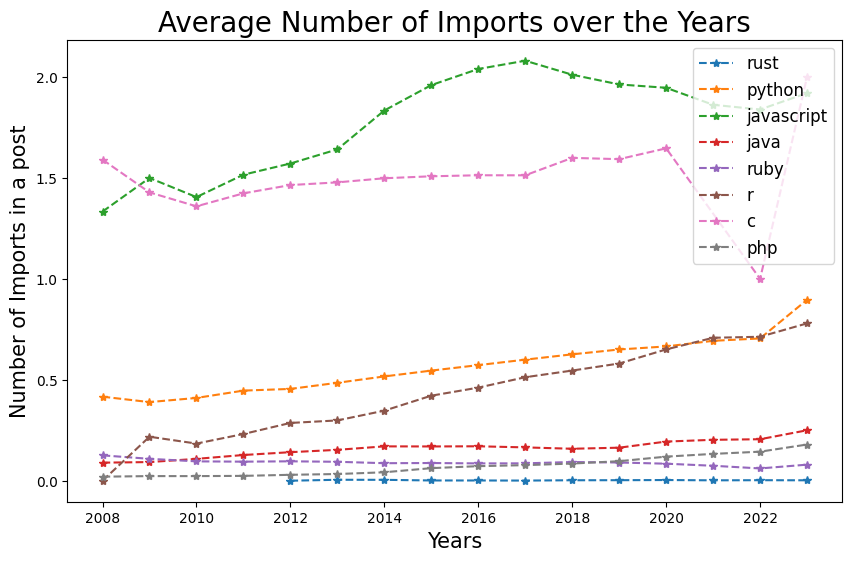

In [53]:
average_imports_per_year = {}
for language in LANGUAGES:
    temp = collections.defaultdict(list)
    for timestamp, libs in post_to_libs[language].items():
        temp[int(timestamp[:4])].append(len(libs))
    average_imports_per_year[language] = {k: sum(v) / len(v) for k, v in temp.items()}
            

plt.figure(figsize=(10,6))
for language in LANGUAGES:
    d = average_imports_per_year[language]
    plt.plot(sorted(d.keys()), [d[x] for x in sorted(d.keys())], "*--", label=f"{language}")
plt.xlabel("Years", fontsize=15)
plt.ylabel("Number of Imports in a post", fontsize=15)
plt.legend(fontsize=12)
plt.title("Average Number of Imports over the Years", fontsize=20)


Text(0.5, 1.0, 'Average Number of Imports over the Years (posts with libs only)')

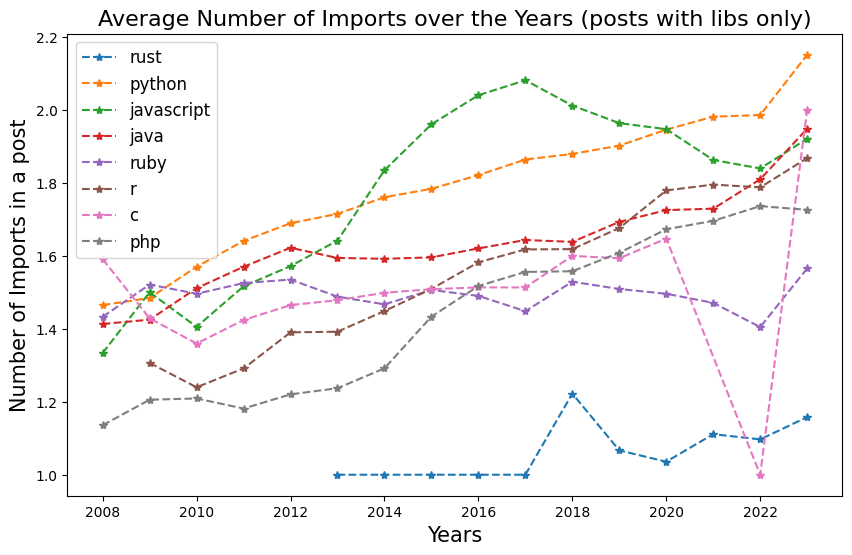

In [54]:
average_imports_per_year_filtered = {}
for language in LANGUAGES:
    temp = collections.defaultdict(list)
    for timestamp, libs in post_to_libs[language].items():
        if not libs:
            continue
        temp[int(timestamp[:4])].append(len(libs))
    average_imports_per_year_filtered[language] = {k: sum(v) / max(1, len(v)) for k, v in temp.items()}
            

plt.figure(figsize=(10,6))
for language in LANGUAGES:
    d = average_imports_per_year_filtered[language]
    plt.plot(sorted(d.keys()), [d[x] for x in sorted(d.keys())], "*--", label=f"{language}")
plt.xlabel("Years", fontsize=15)
plt.ylabel("Number of Imports in a post", fontsize=15)
plt.legend(fontsize=12)
plt.title("Average Number of Imports over the Years (posts with libs only)", fontsize=16)
